<a href="https://colab.research.google.com/github/NeuromatchAcademy/precourse/blob/main/tutorials/W0D3_LinearAlgebra/W0D3_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/NeuromatchAcademy/precourse/main/tutorials/W0D3_LinearAlgebra/W0D3_Tutorial1.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 1: Vectors
**Week 0, Day 3: Linear Algebra**

**By Neuromatch Academy**


__Content creator:__ Ella Batty

__Content reviewers:__ Keith van Antwerp, Pooya Pakarian, Anoop Kulkarni

__Production editors:__ Siddharth Suresh, Ella Batty  

<p align='center'><img src='https://github.com/NeuromatchAcademy/widgets/blob/master/sponsors.png?raw=True'/></p>

---
# Tutorial Objectives
*Estimated timing of tutorial: 1 hour, 25 minutes*

During today, we will learn the basics of linear algebra, focusing on the topics that underlie the material on future days in the NMA Computational Neuroscience course. In this tutorial, we focus on vectors: their definition, their properties & operations, and how we can use them to define our coordinate system. 

By the end of this tutorial, you will:
* Be able to provide an example of how linear algebra is used in computational neuroscience
* Be able to describe vectors, their properties (dimensionality/length), and their operations (scalar multiplication, vector addition, dot product) geometrically 
* Be able to determine and explain the number of basis vectors necessary for a given vector space


In [ ]:
# @title Video 1: Why do we care about linear algebra?
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')  
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'qsK7pHrJU5M'), ('Bilibili', 'BV1vf4y1b7mr')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

---
# Setup

Execute the following cells to set up the notebook environment

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Figure settings
import ipywidgets as widgets  # interactive display
from ipywidgets import fixed
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [3]:
# @title Plotting functions
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


def visualize_vectors(v, v_unit):
  """ Plots a 2D vector and the corresponding unit vector

  Args:
    v (ndarray): array of size (2,) with the vector coordinates
    v_unit (ndarray): array of size (2, ) with the unit vector coordinates

  """
  fig, ax = plt.subplots()

  # Set up plot aesthetics
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.set(xlim = [-6, 6], ylim = [-6, 6])
  ax.grid(True, alpha=.4, linewidth=1, zorder=0)

  # Plot vectors
  v_arr = ax.arrow(0, 0, v[0], v[1], width=0.08, color='#648FFF',
                   length_includes_head=True, zorder=2);
  v_unit_arr = ax.arrow(0, 0, v_unit[0], v_unit[1], width=0.08,
                        color='#DC267F',
                        length_includes_head=True, zorder=3);
  ax.set(xlim = [-4, 4], ylim = [-4, 4]);

  # Add legend
  leg = ax.legend([v_arr, v_unit_arr],
                  [r"Vector $\mathbf{v}$",
                   r"Normalized vector $\tilde{\mathbf{v}}$"],
                  handlelength=0, fontsize=20, loc='upper left')
  for handle, label in zip(leg.legendHandles, leg.texts):
    label.set_color(handle.get_facecolor())
    handle.set_visible(False)

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
      FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
      self._verts3d = xs, ys, zs

    def draw(self, renderer):
      xs3d, ys3d, zs3d = self._verts3d
      xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
      self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
      FancyArrowPatch.draw(self, renderer)

    def do_3d_projection(self, renderer=None):
      xs3d, ys3d, zs3d = self._verts3d
      xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
      self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

---

# Section 1: Intro to vectors

## Section 1.1: What is a vector?



In [ ]:
# @title Video 2: Vector Definition & Properties
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')  
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'Vi6L9fBk2Uc'), ('Bilibili', 'BV1sX4y1P7wT')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

This video covers the definition of vectors, the dimensionality and length of vectors, and zero/unit vectors.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

A vector $\mathbf{x}$ can be considered from at least two perspectives: as an ordered list of numbers or as an arrow with the base at the origin of a coordinate system. These are two ways of looking at a single thing: in the arrow case, the tip of the arrow is defined by a coordinate (which can be represented by the ordered list). 
<br/><br/>

The **dimensionality of a vector** is determined by the number of components in the ordered list (or the dimensionality of the space in which the arrow exists). For example, $\mathbf{x} = \begin{bmatrix} 4 \\ 2 \\ 1 \end{bmatrix}$ is a 3 dimensional vector. We can refer to components by $\mathbf{x}_i$ where i indicates the position of the component. In this vector, $\mathbf{x_1} = 4$, $\mathbf{x_2} = 2$, and $\mathbf{x_3} = 1$. 

<br/><br/>
One defining property of a vector is its length: $||\mathbf{x}||$. This is the length of the arrow and can be computed as the square root of the sum of all components squared:

\begin{equation}
||\mathbf{x}|| = \sqrt{\sum_{i=1}^N \mathbf{x}_i^2}
\end{equation}

<br/><br/>
We have two special types of vectors with specific names. **Zero vectors** have length 0 (and all components equal 0). **Unit vectors** have length 1. You can normalize a vector and create a unit vector, $\tilde{\mathbf{x}}$, by dividing by its length,$||\mathbf{x}||$ :

\begin{equation}
\tilde{\mathbf{x}} = \frac{\mathbf{x}}{||\mathbf{x}||}
\end{equation}

### Coding Exercise 1.1: Normalizing vectors

In this exercise, you will first create the below vector, $\mathbf{v}$, using a numpy array. You will then implement a function, `normalize_vector`, that outputs a normalized version of the input vector (by dividing each component by the vector length).  You will then visualize both the original vector and the unit vector. 

First think: how do you think the normalized unit vector will compare to the original vector in terms of direction and length?


\begin{equation}
\mathbf{v} = 
\begin{bmatrix}
4 \\
1
\end{bmatrix}
\end{equation}

C:\Users\Cornell\AppData\Local\Temp\ipykernel_16968\981831466.py:37: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, label in zip(leg.legendHandles, leg.texts):


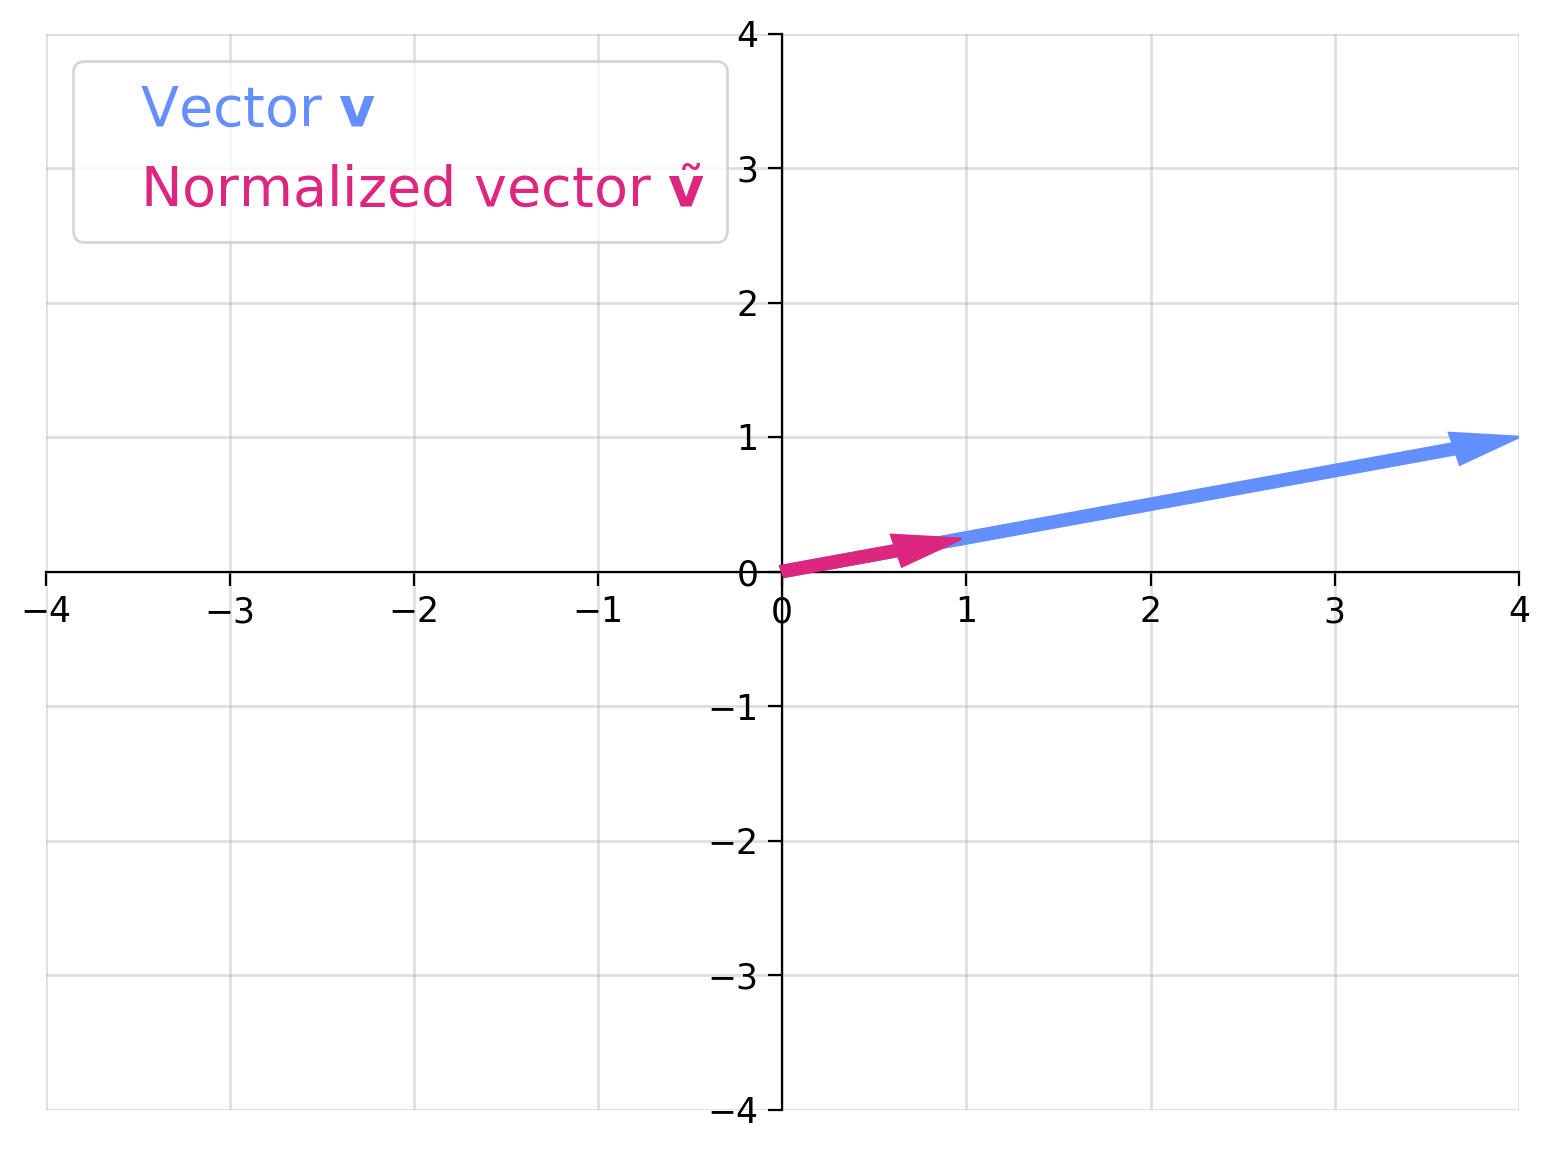

In [5]:
def normalize_vector(input_vector):
  """ Normalizes a vector to length 1

  Inputs:
    input_vector (ndarray): array of shape (n_dim, ) where n_dim is the
        dimensionality of the vector

  Outputs:
    (ndarray): normalized vector of length 1
  """

  #################################################################################
  ## TODO for students: complete normalize_vector function ##
  # Fill out function and remove
  #raise NotImplementedError("Student exercise: complete normalize_vector function")
  #################################################################################

  # Compute vector length (use np.linalg.norm)
  vector_length = np.linalg.norm(input_vector)

  # Create normalized vector
  normalized_vector = input_vector/vector_length

  return normalized_vector

# Create vector v from above (use np.array)
v = np.array([4, 1])

# Call the function
v_unit = normalize_vector(v)

# Visualize the vectors
visualize_vectors(v, v_unit)

In [ ]:
# to_remove solution
def normalize_vector(input_vector):
  """ Normalizes a vector to length 1

  Inputs:
    input_vector (ndarray): array of shape (n_dim, ) where n_dim is the
        dimensionality of the vector

  Outputs:
    (ndarray): normalized vector of length 1
  """

  # Compute vector length (use np.linalg.norm)
  vector_length = np.linalg.norm(input_vector)

  # Create normalized vector
  normalized_vector = input_vector / vector_length

  return normalized_vector

# Create vector v from above (use np.array)
v = np.array([4, 1])

# Call the function
v_unit = normalize_vector(v)

# Visualize the vectors
with plt.xkcd():
  visualize_vectors(v, v_unit)



Note that the unit vector still points in the same direction as the original (it overlays it). Dividing each component by a constant (the length) does not change the direction. The only change is the length - the normalized vector has a length of 1. 

## Section 1.2: Vector operations

*Estimated timing to here from start of tutorial: 20 min*

In [ ]:
# @title Video 3: Linear Combinations of Vectors
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')  
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'e8Y6kNICH-8'), ('Bilibili', 'BV1rL411p7iR')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

This video covers vector operations: scalar multiplication, vector addition, and linear combinations.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

We have several mathematical operations we perform on or with vectors. **Scalar multiplication** of a vector changes its length but not its direction (except for sometimes reversing by 180 degrees as we'll see in the next demo). When we multiply a vector, $\mathbf{x}$,  by a scalar, $a$, we multiply each individual component by the scalar:

$$ a\mathbf{x} = \begin{bmatrix}
    a\mathbf{x}_1 \\ a\mathbf{x}_2 \\ \vdots \\ a\mathbf{x}_N
\end{bmatrix}$$

You can visualize **vector addition** as the stacking of the two arrows head to tail. In essence, you are moving the second vector so its base is at the tip of the first, without changing its direction. The tip of this stacked second vector is the new added vector's tip. In order words, if you visualize two vectors as sides of a parallelogram, adding them will create a vector with the 4th vertex of that parallelogram as its tip. Numerically, this means that we add the corresponding components of each vector:


 $$\mathbf{x} + \mathbf{y} = \begin{bmatrix}
           \mathbf{x}_{1} + \mathbf{y}_1 \\ \mathbf{x}_{2} + \mathbf{y}_2\\ \vdots \\ \mathbf{x}_{N} + \mathbf{y}_N 
\end{bmatrix}$$


We call a group of 2 or more vectors a **set of vectors**. A **linear combination** of a set of vectors is a combination of the set using scalar multiplication and vector addition. Essentially, we are multiplying each vector in the set by a scalar and then adding all the scalar multiplied vectors together: the output of this (another vector) is a linear combination of the set. More formally defined, a vector, $\mathbf{u}$, is a linear combination of a set of vectors $\mathbf{v}^1, \mathbf{v}^2, ..., \mathbf{v}^N$ with (scalar) weights $c_1, c_2, ...c_N$ if:

$$\mathbf{u} = c_1\mathbf{v}^1 + c_2\mathbf{v}^2 + ... + c_n\mathbf{v}^N $$.
</details>


### Interactive Demo: Linear combination of vectors
In the following demo, we will demonstrate a linear combination of two vectors, $\mathbf{x}$ and $\mathbf{y}$. 

\begin{equation}
\mathbf{z} = a\mathbf{x} + b\mathbf{y}
\end{equation}

where $\mathbf{x} = \begin{bmatrix}3 \\ 1 \end{bmatrix}$ and $\mathbf{y} = \begin{bmatrix}-1 \\ 2 \end{bmatrix}$.

You will play with the scalar multiples $a$ and $b$ to visualize both scalar multiplication and vector addition. Think and talk through the following questions:

1. How does $a\mathbf{x}$ compare to $\mathbf{x}$ when $a$ is negative? 
2. How does $a\mathbf{x}$ compare to $\mathbf{x}$ when $a$ is a fraction?
3. Can you get $\mathbf{z}$ to point to anywhere in the 2D space with combinations of $a$ and $b$?
4. Would this be the case no matter what $\mathbf{x}$ and $\mathbf{y}$ are, as long as they are both 2D vectors?

In [ ]:
 #@markdown Make sure you execute this cell to enable the widget! Move the sliders for “a” and “b”. After releasing the slider, be patient for a couple of seconds to see the desired change.


def plot_arrows(x, y, a_times_x, b_times_y):
  fig, ax = plt.subplots(figsize=(10, 7))

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  ax.set_aspect('equal', adjustable='box')
  ax.set(xlim = [-10, 10], ylim = [-10, 10], xticks = np.arange(-10, 10), yticks = np.arange(-10, 10), xticklabels = [], yticklabels = [])

  ax.grid(alpha=.4)

  z = a_times_x + b_times_y
  z_arr = ax.arrow(0, 0, z[0], z[1], width=.08, color='k', length_includes_head = True);

  x_orig, = ax.plot([0, x[0]], [0, x[1]], '--', color='#648FFF')
  y_orig, = ax.plot([0, y[0]], [0, y[1]], '--',  color='#DC267F')

  ax_arr = ax.arrow(0, 0, a_times_x[0], a_times_x[1], width=.08, color='#648FFF', length_includes_head = True);
  by_arr = ax.arrow(0, 0, b_times_y[0], b_times_y[1], width=.08, color='#DC267F', length_includes_head = True);

  ax.plot([a_times_x[0], z[0]], [a_times_x[1], z[1]], '--k')
  ax.plot([b_times_y[0], z[0]], [b_times_y[1], z[1]], '--k')


  leg = ax.legend([x_orig, y_orig, ax_arr, by_arr, z_arr], [r"$\mathbf{x}$", r"$\mathbf{y}$", r"$a\mathbf{x}$", r"$b\mathbf{y}$", r"$\mathbf{z} = a\mathbf{x} + b\mathbf{y}$"], handlelength = 2, fontsize = 25, loc = 'center left', bbox_to_anchor=(1.05, .5))
  for handle, label in zip(leg.legendHandles, leg.texts):
      try:
          label.set_color(handle.get_facecolor())
      except:
          label.set_color(handle.get_color())
      #handle.set_visible(False)

@widgets.interact(a = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1), b = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1))
def plot_linear_combination(a, b):
  x = np.array([3, 1])
  y = np.array([-1, 2])

  plot_arrows(x, y, a*x, b*y)

In [ ]:
# to_remove explanation

"""
1. When a is negative, the direction of ax is the exact opposite of x
2. When a is a positive fraction, ax is the same direction but shorter than x
3. Yes you can get z to point anywhere in 2D space by changing a and b around
4. No, if x and y pointed in the same direction, you could not get anywhere in
   2D space. We will delve into this in the next section!
""";

---
# Section 2: Defining space through vectors

## Section 2.1: Span & Linear Independence

*Estimated timing to here from start of tutorial: 35 min*

In [ ]:
# @title Video 4: Span and Linear Independence
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')  
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'g7DoHnZkUlw'), ('Bilibili', 'BV1iv411H7bK')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

This video covers the span of a set of vectors and when a set of vectors is linearly independent.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

The **span of a set of vectors** is the set of all possible linear combinations of those vectors. In the last demo, you saw that the vector $\mathbf{x}$ and the vector $\mathbf{y}$ spanned 2D space (${\rm I\!R}^2$). This means you can get to any point in 2D space (corresponding to vector $\mathbf{v}$ with some combination of $a$ and $b$, the scalar multiples in a linear combination of $\mathbf{x}$ and $\mathbf{y}$:

$$\mathbf{v} = a\mathbf{x} + b\mathbf{y}$$

Even more specifically, in this situation, each point in 2D space is identified by a unique and single combination of $a$ and $b$: if you know the point, you know what $a$ and $b$ are. 

A set of vectors is linearly dependent if one can be written as a linear combination of the others. If this is not the case, the set of vectors is linearly independent.
</details>

### Think! 2.1: Determing dependence

Let's say we have four vectors: 

\begin{equation}
\mathbf{a} = 
\begin{bmatrix} 4 \\ 2 \\ 0 \end{bmatrix},
\mathbf{b} = \begin{bmatrix} 1 \\ 0 \\ 3 \end{bmatrix}, 
\mathbf{c} = \begin{bmatrix} 5 \\ 2 \\ 3 \end{bmatrix},
\mathbf{d} = \begin{bmatrix} 3 \\ 3 \\ 2 \end{bmatrix}
\end{equation}

1. Are these vectors linearly independent or dependent? Why?
2. What is the span of the set of vectors $\{\mathbf{a}, \mathbf{b}, \mathbf{c}, \mathbf{d}\}$? 
3. What is the span of the set of vectors $\{\mathbf{a}, \mathbf{b}, \mathbf{c}\}$? 
4. What is the span of a set just consisting of vector $\{\mathbf{a}$} (in general terms)?
5. What is the span of the set of vectors $\{\mathbf{a}, \mathbf{b}$} (in general terms)?

In [ ]:
# @markdown Execute this cell to visualize vectors

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = Arrow3D([0, 4], [0, 2],
                [0, 0], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#648FFF")

ax.add_artist(a)
b = Arrow3D([0, 1], [0, 0],
                [0, 3], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#785EF0")

ax.add_artist(b)
c = Arrow3D([0, 5], [0, 2],
                [0, 3], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#DC267F")

ax.add_artist(c)
d = Arrow3D([0, 3], [0, 3],
                [0, 2], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#FFB000")

ax.add_artist(d)

leg = ax.legend([a, b, c, d], ['a', 'b', 'c', 'd'], handlelength = 0, fontsize = 20, loc = 'upper left')
for handle, label in zip(leg.legendHandles, leg.texts):
  label.set_color(handle.get_facecolor())
  handle.set_visible(False)
ax.set(xlim = [0, 5], ylim = [5, 0], zlim = [0, 5]); #, xlabel = 'Neuron 1 Firing Rate',  ylabel = 'Neuron 2 Firing Rate', zlabel = 'Neuron 3 Firing Rate');

Check out this visualization prepared by Oğul Can Yurdakul to better see the vectors: https://www.geogebra.org/3d/hherq78z!

In [ ]:
# to_remove explanation

"""
  1) They are linearly dependent as one can be formed as a linear combination of
     the others (a + b = c). You could also have known this because you have four
     3D vectors. You don't need 4 vectors to get anywhere in 3D space!

  2) The span of a, b, c, and d is all of 3D space (R^3).

  3) The span of a, b, and c is a 2D plane through all of 3D space (note this is not R^2)

  4) The span of a is a 1D line through 3D space (note this is not R^1)

  5) The span of a and b is a 2d plane through 3D space (note this is not R^2)
""";

## Section 2.2: Basis vectors

*Estimated timing to here from start of tutorial: 50 min*


In [ ]:
# @title Video 5: Basis vectors
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')  
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'kgjwmHZH-So'), ('Bilibili', 'BV1Wh411h7qZ')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

This video covers what a basis is, the standard basis, and the properties of basis vectors.
<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>


If a set of vectors spans 2D space are linearly independent, they form a **basis** for 2D space.  This means that we can identify all points in 2D space with reference to these two vectors, instead of to the traditional x-axis and y-axis coordinates. In fact, you've been using a basis all along when you identify points by their x-axis and y-axis coordinates: the **standard basis**! In 2D space, the standard basis vectors ($\tilde{\mathbf{e}}_1$ and $\tilde{\mathbf{e}}_2$) are the unit vectors corresponding to the x and y axes:
 
\begin{equation}
\tilde{\mathbf{e}}_1 = \begin{bmatrix} 1\\ 0\\ \end{bmatrix},
\tilde{\mathbf{e}}_2 = \begin{bmatrix} 0\\ 1\\ \end{bmatrix}
\end{equation}

When you refer to a point on a 2D plot as (4, 2), you are really identifying the scalar multiples to get to that point as a linear combination of the standard basis. The standard basis is convenient - and what we're used to - but it is essential for a variety of applications of linear algebra (including some we'll encounter in this course) to be able to switch our frame of reference to a different basis. In this example, we can now refer to points as (a, b) where a and b are the scalar multiples to get to that point as a linear combination of $\mathbf{x}$ and $\mathbf{y}$.

Let's return to this idea of linear independence of vectors.  

I've been referring to 2D space a lot but there are lots of **vector spaces** for which we can use basis vectors. We'll leave the formal definition of vector spaces to the bonus material as it's a little unwieldy but basically it's a set of vectors where all linear combinations of all vectors are included in the set. 1D space (${\rm I\!R}^1$), 2D space (${\rm I\!R}^2$), 3D space (${\rm I\!R}^3$), and so on are all vector spaces. These are not the only ones though: subsets of these vector spaces can also be vector spaces themselves. For example, a 1D line through a 2D plane is a vector space.  And we have even more unusual vector spaces - I give an example of one in the bonus material.

</details>

### Think! 2.2: Figuring out a basis

Let's say we are looking at the firing rates of 3 neurons. We can represent their activity in a 3D plot, as below. It turns out that due to their tightly-linked interactions, they always fire in such a way that the point in 3D space falls along a 2D plane (that passes through the origin). Basically, every single data point we record of the firing rates of the 3 neurons falls on that plane. This is represented by the blue plane in the figure below. This 2D plane is a subspace of all of 3-D space (R3).

1) How many basis vectors would you need for the 2D plane? How many components would each basic vector have?

2) How many numbers would you need to be able to fully describe the state of the 3 neuron population at a given time?



In [ ]:
# @markdown Execute this cell to see figure

fig = plt.figure()

# add axes
ax = fig.add_subplot(111,projection='3d')

xx, yy = np.meshgrid(range(-4, 4), range(-4, 4))
z = .7*xx + -.2*yy

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.5)

ax.set(xlim = [0, 5], ylim = [5, 0], zlim = [0, 5], xlabel = 'Neuron 1 Firing Rate',  ylabel = 'Neuron 2 Firing Rate', zlabel = 'Neuron 3 Firing Rate');
#ax.invert_xaxis()

In [ ]:
# to_remove explanation

"""
1)  You would need 2 basis vectors as the true dimensionality of the 2D plane is 2.
    Each vector would have 3 components. The two basic vectors would be independent
    vectors that lie in the 2D plane.

2)  You can describe the state of the 3 neuron population activity with 2 numbers by
    using the new basis vectors as the coordinate system. We can now describe the neural
    activity in a lower dimensional space because there is lower-dimensional structure.
    We'll learn much more about this, and lots of related interesting research, on the
    dimensionality reduction day in the comp neuro course!
""";

# Section 3: The dot product

## Section 3.1: Neural modeling using the dot product

*Estimated timing to here from start of tutorial: 1 hr, 10 min*

In [ ]:
# @title Video 6: The dot product
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')  
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'Ene_TYyTdNM'), ('Bilibili', 'BV1Wh411h7KM')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

This video covers the dot product by setting up a simple neural model of an LGN neuron where the activity is the dot product of a weights vector and a retinal firing rates vector.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

The dot product between two vectors is a scalar value computed as the sum of element-wise multiplication of vector components. 

\begin{equation}
\text{Dot product of } \mathbf{x} \text{ and } \mathbf{y} = \mathbf{x} \cdot \mathbf{y} = \sum_{i=1}^{N} \mathbf{x}_i\mathbf{y}_i
\end{equation}

If we have vector $\mathbf{x} = \begin{bmatrix}2\\ 3\\\end{bmatrix}$ and $\mathbf{y} = \begin{bmatrix}1\\ 4\\\end{bmatrix}$, then:

\begin{equation}
\mathbf{x} \cdot \mathbf{y} = 2*1 + 3*4 = 14\text{.}
\end{equation}

We will discuss more about what the dot product represents geometrically after the next demo.


We are using the dot product to model neural firing. Specifically, we have multiple retinal neurons connected to a LGN neuron. The LGN neuron response is a weighted sum of the retinal firing rates (where the weights are the strengths of the synapses). We can capture this as the dot product between a vector of retinal firing rates and a vector of weights from each retinal neuron. 

</details>

In code, we can compute the dot product between two vectors represented by numpy arrays using `np.dot`:

```python
x = np.array([2, 3])
y = np.array([1, 4])
dot_prod = np.dot(x, y)
```

In the following demo, we have two retinal neurons with varying firing rates ($r_1$ and $r_2$). We will allow our firing rates to be negative in this example. We can represent our retinal firing rates with the vector $\mathbf{r} = \begin{bmatrix} r_1\\ r_2\\ \end{bmatrix}$.

We have weights from each of these to an LGN neuron: the weight of the connection from the first retinal neuron is 1 and the weight from the second is 2. See the circuit below. We can represent our weights with the vector $\mathbf{w} = \begin{bmatrix} 1\\ 2\\ \end{bmatrix}$.

The LGN firing rate is the dot product of the retinal firing rate vector and the weight vector:

\begin{equation}
g = \mathbf{w}\cdot\mathbf{r} = w_1r_1 + w_2r_2
\end{equation}

<figure>
<img src="https://raw.githubusercontent.com/NeuromatchAcademy/precourse/main/tutorials/W0D3_LinearAlgebra/static/nodes.png">
</figure>

### Interactive Demo 3.1: LGN firing


In the following demo you will try various combinations of firing rates of the retinal neurons (thus moving the vector that corresponds to the firing rates).  When you move the retinal firing rates around, you will see the heatmap in that area appear, which shows the corresponding LGN neuron firing rate (for that combo of retina firing). Remember that this value is computed as the dot product between the retinal firing rate vector and the weight vector.

Play with the following demo and then discuss these questions:


1.   For a given length of the retinal firing rate vector, what direction maximally excites the LGN neuron (highest postsynaptic firing rate)? How does it relate to the weights vector?
2.   For a given length of the retinal firing rate vector, what direction minimally excites the LGN neuron? 
3.   When does the LGN neuron have 0 firing rate? What is the relationship between the weights and retinal firing rate vector?
4.   For a given direction, how does the LGN firing rate vary with length of the retinal firing rate vector?
5.   Let's say the retinal neurons are tightly linked and the length of the retinal firing rate vector has to be 1. In other words, it has to be a unit vector. How would you find the retinal firing rates that maximally excite the LGN neuron?

In [ ]:
#@markdown Make sure you execute this cell to enable the widget!

step = .1
x_vec = np.arange(-4, 4.001, step)
y_vec = np.arange(-4, 4.001, step)
n_pixels = x_vec.shape[0]


heatmap = np.zeros((n_pixels, n_pixels))
y = np.array([1, 3])
for i, coord1 in enumerate(x_vec):
  for j, coord2 in enumerate(x_vec):
    heatmap[i, j] = np.dot(np.array([coord1, coord2]), y)
circle_mask = np.zeros((n_pixels, n_pixels))

for i, coord_i in enumerate(x_vec):
  for j, coord_j in enumerate(y_vec):
    circle_mask[i, j] = np.sqrt(coord_i**2 + coord_j**2)

circle_mask = circle_mask < 4

heatmap = heatmap * circle_mask
mask = np.zeros((n_pixels, n_pixels))

def plot_heatmap(x, y, mask):

  fig, ax = plt.subplots()

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  heatmap[np.where(x_vec == x[0])[0], np.where(x_vec == x[1])[0]] = np.dot(x, y)

  masked_x = np.abs(x_vec - x[0]) < 1
  masked_y = np.abs(y_vec - x[1]) < 1
  mask += np.outer(masked_x, masked_y)
  mask = np.minimum(mask, 1)

  im = ax.imshow((heatmap * mask).T, vmin = -15, vmax = 15, origin = 'lower', alpha = .5, extent=[-n_pixels/2., n_pixels/2., -n_pixels/2., n_pixels/2. ], cmap = 'bwr')
  cbar = plt.colorbar(im, ax = ax)
  cbar.set_label('Response of LGN neuron (g)', rotation=270, labelpad=20)
  ax.set(xticklabels = [], yticklabels = [], xlabel = '$\mathbf{r}_1$')
  ax.set_ylabel('$\mathbf{r}_2$', rotation=0)

  ax.xaxis.set_label_coords(0, .45)
  ax.yaxis.set_label_coords(.5, 1)
  fr_arr = ax.arrow(0, 0, (1/step)*x[0], (1/step)*x[1], width=.5, color='#40B0A6', length_includes_head = True);
  we_arr = ax.arrow(0, 0, (1/step)*y[0], (1/step)*y[1], width=.5, color='k', length_includes_head = True);


  leg = ax.legend([fr_arr, we_arr], ['Retina firing rate vector', 'Weight vector'],
                  handlelength = 0, frameon=False, fontsize = 17,loc = 'center',
                  bbox_to_anchor=(.5, -.1))
  for handle, label in zip(leg.legendHandles, leg.texts):
        label.set_color(handle.get_facecolor())
        handle.set_visible(False)

  return mask

style = {'description_width': 'initial'}

@widgets.interact(neuron1_firing = widgets.FloatSlider(value=1.0, min=-4, max=4, step=1, style=style), neuron2_firing = widgets.FloatSlider(value=1.0, min=-4, max=4, step=1, style=style), mask = fixed(mask),  heatmap = fixed(heatmap))
def plot_linear_combination(neuron1_firing, neuron2_firing, mask):
  firing_rates = np.array([neuron1_firing, neuron2_firing])
  weights = np.array([1, 2])
  mask = plot_heatmap(firing_rates, weights, mask)

In [ ]:
# to_remove explanation

"""
1)  The direction of the retinal firing rate vector that maximially excites
    the LGN neuron is the direction of the weight vector.

2)  The direction of the retinal firing rate vector that mimimally excites
    the LGN neuron is the opposite direction of the weight vector.

3)  The LGN neuron has 0 firing rate when the firing rate vector is
    perpendicular to the weight vector

4)  The absolute value of the LGN firing rate grows bigger as the length
    of the retinal firing rate increase.

5)  You want a unit vector in the direction of the weight vector. You can just normalize
    the weight vector (divide by it's length), as we saw in Section 1!
""";

## Section 3.2: The geometry of the dot product

*Estimated timing to here from start of tutorial: 1 hr, 20 min*

In [ ]:
# @title Video 7: The geometry of the dot product
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')  
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'S2wKFY5iWUM'), ('Bilibili', 'BV1bo4y1C7JL')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

This video covers the geometry of the dot product: how it relates to the length of the vectors and the angle between them.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

An alternate way of defining the dot product is as the multiple of the lengths of the two vectors and the angle between them $\theta$:

\begin{equation}
\mathbf{x} \cdot \mathbf{y} = ||\mathbf{x}|| \cdot ||\mathbf{y}|| \cdot \text{cos}\theta
\end{equation}

This means that:

- the dot product is largest when the vectors are the same direction (angle $0^{\text{o}}$)

- the dot product is smallest when the vectors are the opposite direction (angle $180^{\text{o}}$)

- the dot product is 0 when the vectors are perpendicular (angle $90^{\text{o}}$)

- for fixed vector lengths, the dot product is a measure of similarity between the vectors

---
# Summary

*Estimated timing of tutorial: 1 hour, 25 minutes*

Hopefully, this tutorial has helped you better understand the world of vectors. Specifically, you learned: 

* A geometrical view of vectors, their properties, and their operations

* How we can define space in terms of basis vectors

We will build on this knowledge in the next tutorial when we tackle matrices. 


---
# Bonus


---
## Bonus Section 1: Vector space

## Bonus Section 1.1: Definition of vector space

A vector space is formally defined as a collection of vectors that satisfy the below axioms for every vector.

Let $\mathbf{x}$, $\mathbf{y}$, and $\mathbf{z}$ be vectors in a vector space $V$, and $c$ and $d$ scalars.

1. $\mathbf{x}$ + $\mathbf{y}$ in $V$
2. $\mathbf{x}$ + $\mathbf{y}$ = $\mathbf{y}$ + $\mathbf{x}$
3. ($\mathbf{x}$ + $\mathbf{y}$) + $\mathbf{z}$ = $\mathbf{x}$ + ($\mathbf{y}$ + $\mathbf{z}$)
4. Zero vector ($\mathbf{0}$) exists in $V$ such that $\mathbf{x} + \mathbf{0} = \mathbf{x}$
5. Inverse $-\mathbf{x}$ exists in $V$ such that $\mathbf{x} + -\mathbf{x} = \mathbf{0}$
6. $c\mathbf{x}$ in $V$
7. $c(\mathbf{x}+\mathbf{y}) = c\mathbf{x} + c\mathbf{y})$
8. $(c + d)\mathbf{x} = c\mathbf{x}+d\mathbf{x}$
9. $c(d\mathbf{x}) = (cd)\mathbf{x}$
10. $1\mathbf{x} = \mathbf{x}$

## Bonus Section 1.2: Polynomial vector space example 

We will mostly work with the vector spaces you've seen in this tutorial: different N-dimensional spaces of real numbers or subspaces within those. Other things can also be vector spaces though! As an example, one vector space is the set of all polynomials of degree 3 ($P_3$).

Remember that a polynomial of degree 3 is:

\begin{equation}
p(x) = c_o + c_1x + c_2x^2 + c_3x^3
\end{equation}

We can have the basis for this vector space be:

\begin{equation}
\text{Basis: } \{ 1, x, x^2, x^3 \}
\end{equation}

The components of a vector representing a specific polynomial would then be:

\begin{equation}
\mathbf{x} = \begin{bmatrix} c_0 \\c_1\\ c_2\\ c_3 \end{bmatrix}
\end{equation}

These vectors obey all of the axioms in the previous section as you add polynomials, multiple them with a scalar, etc.!

---
## Bonus Section 2: Proof of dot product equivalent definitions

Let's prove that our two definitions of a dot product are equivalent:

\begin{align}
\mathbf{x}\cdot\mathbf{y} &= \sum_{i=1}^N \mathbf{x}_i\mathbf{y}_i \\
&= ||\mathbf{x}||||\mathbf{y}||cos(\theta)
\end{align}

where $\mathbf{x}$ and $\mathbf{y}$ are vectors, and $\theta$ is the angle between them.

<figure>
<img src="https://raw.githubusercontent.com/NeuromatchAcademy/precourse/main/tutorials/W0D3_LinearAlgebra/static/vector_diagram.png">
</figure>

We start by using the law of cosines to write out the formula for $||\mathbf{a}||$, where $\mathbf{a}$ is defined in the figure above.

\begin{equation}
\|\mathbf{a}\|^2 = \color{blue}{\|\mathbf{x}\|^2 + \|\mathbf{y}\|^2 -2\|\mathbf{x}\|\|\mathbf{y}\|cos(\theta)}
\end{equation}

<br>
We can then write $\mathbf{a}$ as a vector subtraction of $\mathbf{x}$ and $\mathbf{y}$. Technically, $\mathbf{a}$ is pictured above not starting at the origin but we ultimately only care about it's length and direction. 

\begin{align*} 
\mathbf{a} &= \mathbf{y} - \mathbf{x} \\ 
\|\mathbf{a}\| &= \|\mathbf{y} - \mathbf{x}\| \\
\end{align*}

One key fact we will use is that the squared length of a vector is the sum of each component squared, which is equivalent to the dot product of a vector with itself. We can now write $||a||^2$ in terms of the dot product. We can substitute in our definition from above for $\mathbf{a}$ in terms of $\mathbf{x}$ and $\mathbf{y}$. 

\begin{align*} 
 \|\mathbf{a}\|^2 &= \mathbf{a}\cdot\mathbf{a} \\ 
 &= (\mathbf{y} - \mathbf{x})\cdot(\mathbf{y} - \mathbf{x}) \\
 &= \mathbf{y}\cdot\mathbf{y} - 2(\mathbf{x}\cdot\mathbf{y}) + \mathbf{x}\cdot\mathbf{x} \\
&= \color{green}{\|\mathbf{y}\|^2 - 2(\mathbf{x}\cdot\mathbf{y}) + \|\mathbf{x}\|^2}\\
\end{align*} 

We can now equate our two definitions for $||a||^2$ from above and solve for the dot product!

\begin{align*}
\color{blue}{\|\mathbf{x}\|^2 + \|\mathbf{y}\|^2 -2\|\mathbf{x}\|\|\mathbf{y}\|cos(\theta)} &= \color{green}{\|\mathbf{y}\|^2 - 2(\mathbf{x}\cdot\mathbf{y}) + \|\mathbf{x}\|^2}\\
 -2\|\mathbf{x}\|\|\mathbf{y}\|cos(\theta) &= - 2(\mathbf{x}\cdot\mathbf{y}) \\
\|\mathbf{x}\|\|\mathbf{y}\|cos(\theta) &= \mathbf{x}\cdot\mathbf{y} \\
\end{align*}

We see our geometrical definition of the dot product!